# IBM Cares Application - Clustering for Employee Sentiment Analysis during lockdown

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import random as rd

## Load the data

In [29]:
raw_data = pd.read_csv('Sample_Survey_Data_V 1.csv')
raw_data

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,...,SOC1,SOC2,SOC3,SOC4,SOC5,PHY1,PHY2,PHY3,PHY4,PHY5
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,...,2.0,2.0,3.0,3.0,4,2.0,2.0,3.0,3.0,4.0
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,...,2.0,2.0,3.0,3.0,4,2.0,2.0,3.0,3.0,4.0
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,...,2.0,2.0,3.0,3.0,3,2.0,2.0,3.0,3.0,NaN
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,...,4.0,3.0,2.0,1.0,1,4.0,3.0,2.0,1.0,1.0
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,...,2.0,3.0,4.0,1.0,3,5.0,4.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,...,1.0,5.0,2.0,3.0,4,3.0,4.0,2.0,3.0,2.0
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,...,1.0,5.0,3.0,1.0,2,NaN,NaN,NaN,3.0,4.0
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,...,4.0,5.0,2.0,3.0,4,4.0,1.0,1.0,1.0,2.0
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,...,4.0,5.0,3.0,1.0,2,2.0,5.0,2.0,NaN,NaN


In [30]:
#Copy into a separate dataframe for further calculations
data_avg = raw_data.copy()

#Avrege out Professional Satisfaction
cols_prf = ['PRF1','PRF2','PRF3', 'PRF4', 'PRF5']
data_avg['average_PRF'] = data_avg[cols_prf].astype(float).mean(axis=1)

#Avrege out Professional Emotional Satisfaction
cols_em = ['EM1','EM2','EM3', 'EM4', 'EM5']
data_avg['average_em'] = data_avg[cols_em].astype(float).mean(axis=1)

#Avrege out Pschyocological Satisfaction
cols_psy = ['PSY1','PSY2','PSY3', 'PSY4', 'PSY5']
data_avg['average_psy'] = data_avg[cols_psy].astype(float).mean(axis=1)

#Avrege out Social Satisfaction
cols_soc = ['SOC1','SOC2','SOC3', 'SOC4', 'SOC5']
data_avg['average_soc'] = data_avg[cols_soc].astype(float).mean(axis=1)

#Avrege out Physical Satisfaction
cols_phy = ['PHY1','PHY2','PHY3', 'PHY4', 'PHY5']
data_avg['average_phy'] = data_avg[cols_phy].astype(float).mean(axis=1) 

In [6]:
data_avg

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,...,PHY1,PHY2,PHY3,PHY4,PHY5,average_PRF,average_em,average_psy,average_soc,average_phy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,...,2.0,2.0,3.0,3.0,4.0,2.8,2.8,2.8,2.8,2.8
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,...,2.0,2.0,3.0,3.0,4.0,2.6,2.8,2.8,2.8,2.8
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,...,2.0,2.0,3.0,3.0,NaN,3.6,2.6,2.5,2.6,2.5
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,...,4.0,3.0,2.0,1.0,1.0,3.8,2.2,2.2,2.2,2.2
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,...,5.0,4.0,3.0,2.0,1.0,3.8,2.8,3.0,2.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,...,3.0,4.0,2.0,3.0,2.0,3.2,3.4,2.8,3.0,2.8
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,...,NaN,NaN,NaN,3.0,4.0,3.6,3.2,3.0,2.4,3.5
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,...,4.0,1.0,1.0,1.0,2.0,3.0,3.6,3.0,3.6,1.8
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,...,2.0,5.0,2.0,NaN,NaN,3.6,2.8,3.2,3.0,3.0


In [31]:
#Only averages in a data frame
data_only_avg = data_avg.copy()

#drop all other columns
data_only_avg.drop(data_only_avg.iloc[:, 10:35], inplace = True, axis = 1)

data_only_avg

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,3.2,3.4,2.8,3.0,2.8
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,3.6,3.2,3.0,2.4,3.5
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,3.0,3.6,3.0,3.6,1.8
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,3.6,2.8,3.2,3.0,3.0


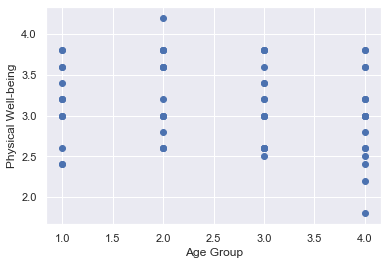

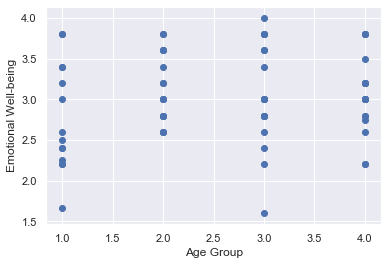

In [32]:
plt.scatter(data_only_avg['Age Group'], data_only_avg['average_PRF'])
plt.xlabel('Age Group')
plt.ylabel('Physical Well-being')
plt.show()

plt.scatter(data_only_avg['Age Group'], data_only_avg['average_em'])
plt.xlabel('Age Group')
plt.ylabel('Emotional Well-being')
plt.show()

In [33]:
#Combine Emotional and Pyschological Well being to measure clusters
data_em_sy = data_only_avg.copy()

cols_em_psy = ['average_em','average_psy']
data_em_sy['average_em_sy'] = data_em_sy[cols_em_psy].astype(float).mean(axis=1)

data_em_sy

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy,average_em_sy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8,2.80
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8,2.80
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5,2.55
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2,2.20
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0,2.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,3.2,3.4,2.8,3.0,2.8,3.10
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,3.6,3.2,3.0,2.4,3.5,3.10
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,3.0,3.6,3.0,3.6,1.8,3.30
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,3.6,2.8,3.2,3.0,3.0,3.00


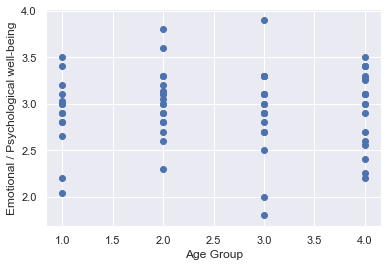

In [34]:
plt.scatter(data_em_sy['Age Group'], data_em_sy['average_em_sy'])
plt.xlabel('Age Group')
plt.ylabel('Emotional / Psychological well-being')
plt.show()

In [11]:
#lets create 4 clustes of the employees 
kmeans = KMeans(4)

In [35]:
#Take specific columns for clustering
data_empsy_clust = data_em_sy[['Age Group', 'average_em_sy']].copy()
data_empsy_clust

,Age Group,average_em_sy
0,2,2.80
1,3,2.80
2,4,2.55
3,1,2.20
4,2,2.90
...,...,...
65,1,3.10
66,2,3.10
67,3,3.30
68,4,3.00


In [36]:
kmeans = KMeans(4)

In [37]:
kmeans.fit(data_empsy_clust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
identified_clusters = kmeans.fit_predict(data_empsy_clust)
identified_clusters

array([2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 3, 0, 3, 0, 1, 2, 3,
       0, 1, 2, 2, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3, 0, 1, 2, 2, 3, 0, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 3, 0, 1, 2, 2, 3, 0, 2, 3, 0, 1,
       2, 3, 0, 1])

In [39]:
data_with_clusters = data_em_sy.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy,average_em_sy,Cluster
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8,2.80,2
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8,2.80,3
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5,2.55,0
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2,2.20,1
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0,2.90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,3.2,3.4,2.8,3.0,2.8,3.10,1
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,3.6,3.2,3.0,2.4,3.5,3.10,2
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,3.0,3.6,3.0,3.6,1.8,3.30,3
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,3.6,2.8,3.2,3.0,3.0,3.00,0


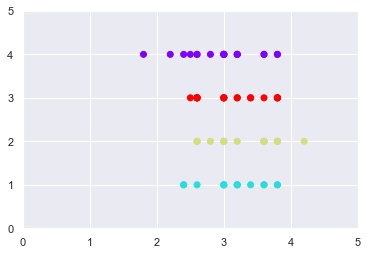

In [40]:
plt.scatter(data_with_clusters['average_PRF'],data_with_clusters['Age Group'], c=data_with_clusters['Cluster'], cmap = 'rainbow' )
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

In [24]:
x = np.random.uniform(low=1, high=5, size=70)
x

array([4.59418625, 1.26532063, 1.85474434, 2.43832491, 1.17461708,
       4.71013497, 2.10397853, 1.57299899, 4.74265344, 2.3018205 ,
       2.14620879, 2.79150532, 2.25597077, 1.35902109, 3.74138726,
       3.03574827, 1.77406686, 3.82240106, 1.9441832 , 2.51225913,
       4.99042064, 3.07366989, 1.16580295, 4.48461273, 2.1762592 ,
       2.7032507 , 4.64559263, 2.60935623, 2.13269656, 3.20180001,
       4.15769065, 1.97715595, 3.69419743, 2.85800385, 1.14271866,
       2.51068131, 4.69476306, 3.21473932, 4.07430278, 2.61651861,
       3.00917084, 4.67750117, 3.93280643, 1.94747332, 3.67017799,
       3.97745829, 4.24761005, 3.8259004 , 3.17630736, 2.08169194,
       3.34701137, 2.84964627, 3.71049271, 1.6780456 , 1.82933852,
       4.41829238, 4.36903503, 1.83866538, 4.00639087, 2.1927577 ,
       3.38248822, 2.55467962, 4.42028089, 4.9111951 , 4.38556611,
       2.44535262, 4.73440084, 4.94694262, 1.23747113, 3.52041496])

In [4]:
y = np.random.uniform(low=1, high=5, size=70)
y

array([1.18647206, 1.0552383 , 3.7810077 , 3.5257749 , 3.14229191,
       2.87013464, 4.32618995, 3.81063086, 4.31802296, 1.02419133,
       4.81306614, 1.88791693, 4.21203376, 2.65354371, 4.53695241,
       3.4430342 , 2.56598366, 1.12792769, 2.07970821, 3.79469886,
       2.59854821, 2.81833035, 4.75264881, 3.90747381, 1.2036265 ,
       2.80088312, 4.15539937, 4.91719506, 4.31085221, 3.74060676,
       2.14805338, 3.60891734, 4.72334944, 3.6037059 , 4.59489322,
       4.91814325, 1.95406482, 1.21388943, 4.27859813, 2.84139052,
       2.45505431, 3.64415225, 2.57972903, 3.25276918, 1.68121522,
       3.78560367, 2.94944329, 4.13349598, 1.42930163, 4.92313037,
       2.08282749, 1.66457316, 3.64453652, 4.39547614, 2.99304879,
       3.63525057, 3.63378075, 4.22897899, 3.64536401, 1.43745437,
       4.17384231, 1.28434294, 2.62456894, 3.84744307, 2.06691456,
       3.99745635, 1.54833551, 2.02512627, 4.93779352, 4.35014666])

In [26]:
data_Random = data_with_clusters.copy()
data_Random['average_PRF'] = x
data_Random['Age Group'] = y

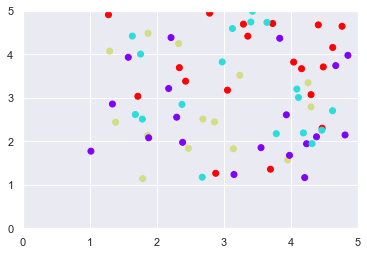

In [27]:
plt.scatter(data_Random['Age Group'], data_Random['average_PRF'],c=data_Random['Cluster'], cmap = 'rainbow' )
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

In [3]:
a = rd.randint(0,4,20)

TypeError: randint() takes 3 positional arguments but 4 were given